# Transformations fixing $T-L$ and $B$

In [1]:
import sympy

sympy.init_printing()

import itertools

import pandas as pd
import plotly.express as px

# ---
from numpy.random import randint as ri
from plotly.subplots import make_subplots
from ToolsForQuasiCord import *
from tqdm.notebook import tqdm

## Translations

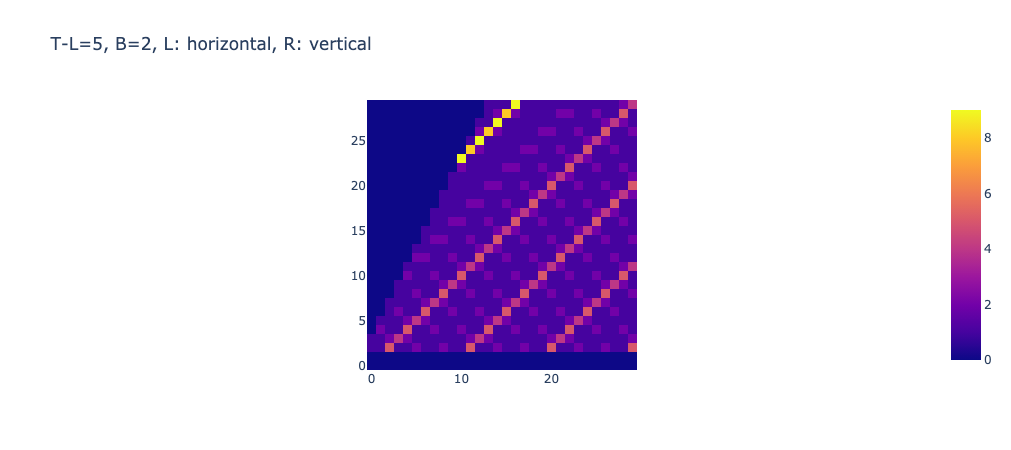

In [6]:
e, b = 5, 2
size = 30
mtx = []
df = pd.read_csv(f"data/fix_T-L_B/T-L={e}_B={b}_100x100.csv")
dfv_trans = np.transpose(df.values)
for r in range(size):
    seq = []
    s = 0  #b + r + b%2 - 1 #int((b+r)/2) -5 + 0*(b+r-e)%2  #
    for i in range(size):
        try:
            seq += [dfv_trans[r][s + i]]
        except:
            seq += [0]
    mtx += [seq]
mtx = np.array(mtx)
px.imshow(
    mtx,
    origin="lower",
    zmin=0,
    title=f"T-L={e}, B={b}, L: horizontal, R: vertical",
).show()
# fig = px.imshow(mtx[:b, : 2 * e - 1], origin="lower", zmin=0, aspect="equal",)
# fig.show()

### Translation along B-axis

In [ ]:
d = 2 * r + 1
# ---
Row, Col = 4, 3
fig = make_subplots(Row, Col, subplot_titles=[f"s={s}" for s in range(Row * Col)])
# ---
for i, j in itertools.product(range(Row), range(Col)):
    s = i * Col + j
    try:
        mat = [tamed_matrix[s + n * d] for n in range(int(size / d) + 1)]
        fig.append_trace(px.imshow(mat).data[0], i + 1, j + 1)
    except:
        pass
# ---
fig.update_layout(title=f"T-L={e}, R={r}, d={d}")
fig.show()

### Translation along L-axis

In [ ]:
d = 2 * e - 1
# ---
Row, Col = 3, 3
fig = make_subplots(Row, Col, subplot_titles=[f"s={s}" for s in range(Row * Col)])
# ---
for i, j in itertools.product(range(Row), range(Col)):
    s = i * Col + j
    mat = np.transpose(
        np.stack([tamed_matrix[:, s + n * d] for n in range(int(size / d) - 5)], 0)
    )
    fig.append_trace(px.imshow(mat).data[0], i + 1, j + 1)
# ---
fig.update_layout(height=400 * Row, width=200 * Col, title=f"T-L={e}, R={r}, d={d}")
fig.show()

In [ ]:
Row, Col = 6, 6
fig = make_subplots(Row, Col)
# ---
for e, r in itertools.product(range(2, Row + 2), range(1, Col + 1)):
    shift = max(0, e - r)
    size = 20
    tamed_matrix = []
    df = pd.read_csv(f"data/T-L_R_series/T-L={e}_R={r}_100x100.csv")
    for b in range(size):
        seq = []
        s = b + r
        for i in range(size):
            try:
                seq += [df.values[b + shift][s + i]]
            except:
                seq += [0]
        tamed_matrix += [seq]
    tv = [2 * r + 1, 2 * e - 1]
    fig.append_trace(px.imshow(tamed_matrix).data[0], e - 1, r)
# ---
fig.update_layout(
    height=200 * Row,
    width=200 * Col,
    title=f"Number of Components Maps: [Rows: 2 <= e <={Row+1}, Cols: 1 <= r <= {Col}",
)
fig.show()

In [ ]:
Row, Col = 6, 6
box_size = 20  # max(2*Col+1, 2*Row-1)
fig = make_subplots(Row, Col)
# ---
for e, r in itertools.product(range(2, Row + 2), range(1, Col + 1)):
    funda_area = np.zeros((box_size, box_size), dtype=int)
    shift = max(0, e - r)
    size = 20
    tamed_matrix = []
    df = pd.read_csv(f"data/T-L_R_series/T-L={e}_R={r}_100x100.csv")
    for b in range(size):
        seq = []
        s = b + r
        for i in range(size):
            try:
                seq += [df.values[b + shift - 1][s + i]]
            except:
                seq += [0]
        tamed_matrix += [seq]
    tv = [2 * r + 1, 2 * e - 1]
    for i, j in itertools.product(range(box_size), range(box_size)):
        try:
            funda_area[i][j] = np.array(tamed_matrix)[1 : tv[0] + 1, : tv[1]][i][j]
        except:
            pass
    hm = px.imshow(funda_area, aspect="equal")
    fig.append_trace(hm.data[0], e - 1, r)
#     fig.append_trace(px.imshow(tamed_matrix).data[0], e-1, r)
# ---
fig.update_layout(
    height=210 * Row,
    width=200 * Col,
    title=f"Fundarmental Areas: [Rows: 2 <= e <={Row+1}, Cols: 1 <= r <= {Col}",
)
# ---
fig.show()

## Not tamed

In [ ]:
e, r = 5, 2
shift = max(0, e - r)
size = 100
df = pd.read_csv(f"data/fix_T-L_B/T-L={e}_B={b}_100x100.csv")
px.imshow(df.values[:size, :size], origin="lower").show()
#---
mtx1 = []
for r in range(size):
    seq = []
    for i in range(size):
        try:
            seq += [df.values[r][i] - df.values[r + b][i + b]]
        except:
            seq += [0]
    mtx1 += [seq]
px.imshow(mtx1, origin="lower", title="(b,b)-trans").show()
#---
mtx2 = []
for r in range(size):
    seq = []
    for i in range(size):
        try:
            seq += [df.values[r][i] - df.values[r + 2 *e-1][i]]
        except:
            seq += [0]
    mtx2 += [seq]
px.imshow(mtx2, origin="lower", title="(2e-1,0)-trans").show()

## Reducing procedure

### Translation along L (and T)

In [ ]:
N = 50
b, r = ri(1, N), ri(1, N)
l = (b + r) + ri(N)
t = l + ri(b + r + 1)
# ---

c = (t, l, b, r)
sqr = Square(c)
print(c, cc(sqr))
print(f"T+L={c[0]+c[1]}, B+R={c[2]+c[3]}, L-(B+R)={c[1]-c[2]-c[3]}")
e = c[0] - c[1]
r = c[3]
ed, rd = 2 * e - 1, 2 * r + 1
print(f"e={e}, ed={ed}, rd={rd}")

In [ ]:
cn = list(c)
cn[0] -= ed
cn[1] -= ed
cn = tuple(cn)

sqrn = Square(cn)
print(cn, cc(sqrn))
print(f"T+L={cn[0]+cn[1]}, B+R={cn[2]+cn[3]}, L-(B+R)={cn[1]-cn[2]-cn[3]}")

In [ ]:
N = 50
count = 0
for itr in tqdm(range(100)):
    b, r = ri(N), ri(N)
    l = (b + r) + ri(N)
    e = ri(b + r + 1)
    # ---
    c = (l + e, l, b, r)
    sqr = Square(c)
    # ---
    ed, rd = 2 * e - 1, 2 * r + 1
    cn = list(c)
    cn[0] += ed
    cn[1] += ed
    cn = tuple(cn)
    flag = True
    try:
        sqrn = Square(cn)
    except:
        #         print(c,ed)
        flag = False
    # ---
    if flag:
        n, nn = cc(sqr), cc(sqrn)
        delta = cn[1] - cn[2] - cn[3]
        if n != nn:
            print(f"[{c},{n}],[{cn},{nn}],ed={ed}, L-(B+R)={delta}")
            if delta < 0:
                coutn += 1
print(count)

 $|T,L, B, R|=|T+ed,L+ed, B, R|$ が $L-(B+R) \geq 0$ のときに成立すること。

In [ ]:
N = 100
iteration_count = 200
count = 0
for itr in tqdm(range(iteration_count)):
    sqr = square_random_generator(N)
    c = sqr.code
    ed = abs(2 * (c[0] - c[1]) - 1)
    rd = 2 * c[3] + 1
    # ---
    cn = list(c)
    cn[0] += ed
    cn[1] += ed
    cn[2] += 0
    cn = tuple(cn)
    flag = True
    try:
        sqrn = Square(cn)
    except:
        print(c, ed)
        flag = False
    # ---
    if flag:
        n, nn = cc(sqr), cc(sqrn)
        delta = c[1] - (c[2] + c[3])
        deltat = c[0] - (c[2] + c[3])
        if n != nn:
            print(f"({n},{nn}), ({c},{cn}),ed={ed}, L-(B+R)={delta}, T-(B+R)={deltat}")
            count += 1
print(count)

$|T,L, B, R|=|T+ed,L+ed, B, R|$ が $T-(B+R)$ の正負に依らないこと

In [ ]:
N = 50
pos, neg, err = 0, 0, 0
for itr in tqdm(range(500)):
    b, r, e = ri(N), ri(N), ri(10)
    l = b + r + ri(N)
    t = ri(l - (b + r), N)
    # ---
    c = (t, l, b, r)
    ed = abs(2 * (c[0] - c[1]) - 1)
    delta = l - (b + r)
    deltat = t - (b + r)
    if delta < 0:
        print("Oops")

    try:
        s = Square(c)
        cn = (t + ed, l + ed, b, r)
        sn = Square(cn)
        n, nn = cc(s), cc(sn)
        if deltat > 0:
            pos += 1
        else:
            neg += 1
        if not (n == nn):
            print(n, nn, delta, deltat)
    except Exception as e:
        err += 1
#         print(f"{c},{e}\n")
print(f"pos={pos},neg={neg}, err={err}")

### Translation along B

In [ ]:
N = 50
# ---
c = (t, l, b, r)
sqr = square_random_generator(N)
c = sqr.code
t, b, r, l = c[0], c[1], c[2], c[3]
e = t - l
print(c, cc(sqr))
print(f"T-L={c[0]-c[1]}, L-(B+R)={c[1]-c[2]-c[3]}")
e = c[0] - c[1]
r = c[3]
ed, rd = abs(2 * e - 1), 2 * r + 1
print(f"e={e}, ed={ed}, rd={rd} \n")
# ---

cn = list(c)
cn[0] += rd  # + ed
cn[1] += rd  # + ed
cn[2] += rd
cn = tuple(cn)

sqrn = Square(cn)
print(cn, cc(sqrn))
print(f"T+L={cn[0]+cn[1]}, B+R={cn[2]+cn[3]}, L-(B+R)={cn[1]-cn[2]-cn[3]}")

In [ ]:
N = 50
iteration_count = 200
count = 0
for itr in tqdm(range(iteration_count)):
    sqr = square_random_generator(N)  # , True)
    # ---
    c = sqr.code
    rd = 2 * c[3] + 1
    cn = [c[0] + rd, c[1] + rd, c[2] + rd, c[3]]
    # ---
    try:
        sqrn = Square(cn)
        n, nn = cc(sqr), cc(sqrn)
        if n != nn:
            print(f"({n},{nn}), ({c},{cn})")
            count += 1
    except:
        print(c, rd)
# ---
print(count)

## Point refrection

In [ ]:
e, r = 9, 16
shift = max(0, e - r)
size = 50
tamed_matrix = []
df = pd.read_csv(f"data/T-L_R_series/T-L={e}_R={r}_100x100.csv")
for b in range(size):
    seq = []
    s = b + r
    for i in range(size):
        try:
            seq += [df.values[b][s + i]]
        except:
            seq += [0]
    tamed_matrix += [seq]
tamed_matrix = np.array(tamed_matrix)
# px.imshow(tamed_matrix, origin='lower').show()
# ---
funda_matrix = tamed_matrix[shift : (shift + 2 * r + 1), : 2 * e - 1]
px.imshow(funda_matrix, origin="lower", zmin=0, aspect="equal").show()

pr_matrix = np.zeros((2 * r + 1, 2 * e - 1), dtype=int)
for i, j in itertools.product(range(2 * r + 1), range(2 * e - 1)):
    pr_matrix[i][j] = tamed_matrix[2 * r + 1 - i][2 * e - 1 - j]
px.imshow(pr_matrix, origin="lower", zmin=0, aspect="equal").show()
px.imshow(funda_matrix - pr_matrix, origin="lower", zmin=0, aspect="equal").show()